In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#reading data
data=pd.read_csv('/Users/Jerry/Desktop/CSC373/jupyter notebook/Credit Card Customer Data.csv')
print(f'Shape of data: {data.shape[0]} rows and {data.shape[1]} columns')
data.head()

Shape of data: 660 rows and 7 columns


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


## We first drop the "Sl_No" and "Customer Key" since they are unique to each customer so it is unneccessary for our k-means algorithm.

In [ ]:
df = data.drop(columns = ['Sl_No', 'Customer Key'])
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


## We only want to implement k-means in two dimensions so I select two columns to do the plotting. The plot clearly shows that there are two big clusters.

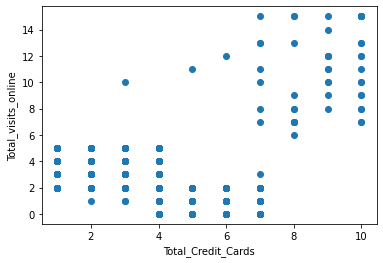

In [ ]:
plt.scatter(df["Total_Credit_Cards"], df["Total_visits_online"])
plt.xlabel("Total_Credit_Cards")
plt.ylabel("Total_visits_online")
plt.show()

In [ ]:
X=df[["Total_Credit_Cards","Total_visits_online"]]

In [ ]:
X.head()

,Total_Credit_Cards,Total_visits_online
0,2,1
1,3,10
2,7,3
3,5,1
4,6,12


In [ ]:
# change dataframe to a 2d array
arr = X.to_numpy()

In [ ]:
arr

array([[ 2,  1],
       [ 3, 10],
       [ 7,  3],
       ...,
       [ 8,  9],
       [10, 15],
       [ 9, 12]])

# functions declared here

In [ ]:
def dist(a, b):
    '''
    calculate the Euclidean distance between two data points(each data point is two dimensions)
    '''
    return np.sqrt(sum(np.square(a-b)))

In [ ]:
def init_centroids(k, X):
    '''
    Initial centroid assignment by randomly pick a float number between min and max
    '''
    arr = []
    for i in range(k):
        cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
        cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
        arr.append([cx1, cx2])
    return np.asarray(arr)

In [ ]:
def assign_cluster(k, X, cg):
    '''
    assign each data point a cluster group
    '''
    cluster = [-1]*len(X)
    for i in range(len(X)):
        dist_arr = []
        for j in range(k):
            dist_arr.append(dist(X[i], cg[j]))
        idx = np.argmin(dist_arr)
        cluster[i] = idx
    return np.asarray(cluster)

In [ ]:
def compute_centroids(k, X, cluster):
    '''
    recompute the new centroids by taking average of a group of data points
    '''
    cg_arr = []
    for i in range(k):
        arr = []
        for j in range(len(X)):
            if cluster[j]==i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0))
    return np.asarray(cg_arr)

In [ ]:
def measure_change(cg_prev, cg_new):
    '''
    cg_prev: the last cluster group
    cg_new: the current cluster group
    return the difference between sum of euclidean distance from the last cluster and the current cluster
    '''
    res = 0
    for a,b in zip(cg_prev,cg_new):
        res+=dist(a,b)
    return res

In [ ]:
def show_clusters(X, cluster, cg):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {0:'blue', 1:'orange', 2:'green'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

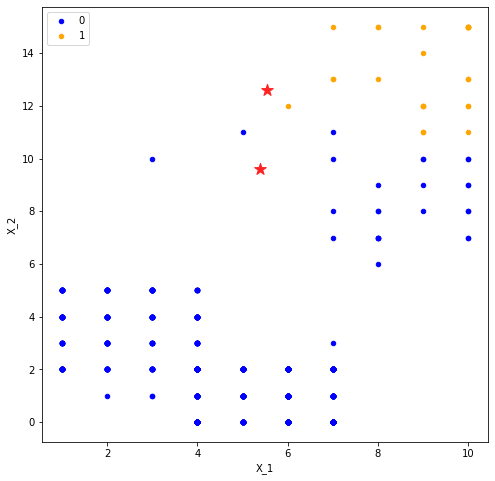

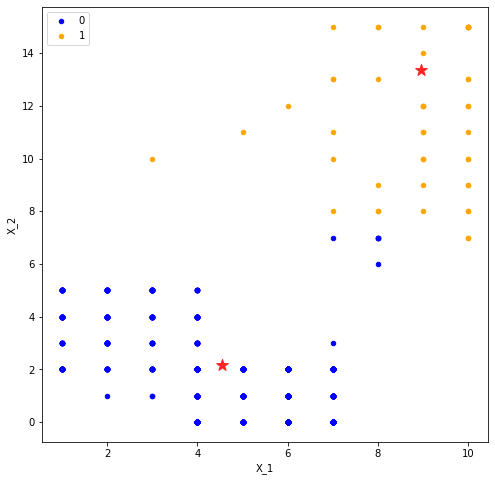

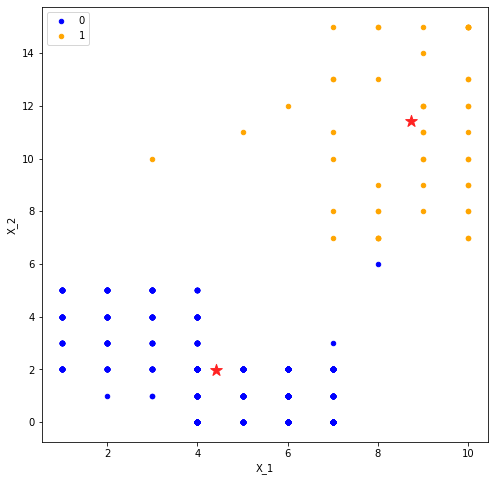

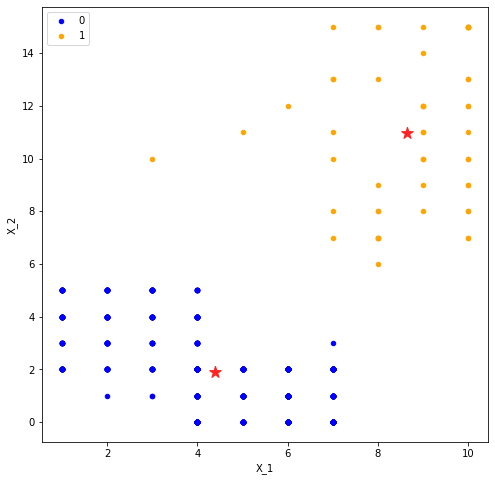

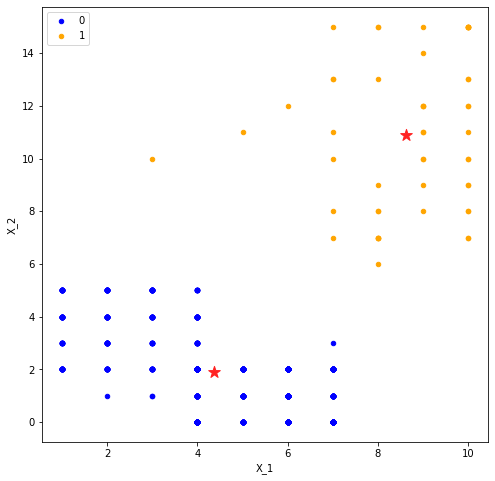

In [ ]:
def k_means(k, X):
    cg_prev = init_centroids(k, X)
    cluster = [0]*len(X)
    cg_change = 100
    while cg_change>.005:
        cluster = assign_cluster(k, X, cg_prev)
        show_clusters(X, cluster, cg_prev)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = measure_change(cg_new, cg_prev)
        cg_prev = cg_new
    return cluster

cluster = k_means(2, arr)


In [ ]:
#reference: https://www.youtube.com/watch?v=IB9WfafBmjk